In [ ]:
#Here we are going to import all relevant libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import warnings # Importing warnings to ignore warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#How many rows and columns we have in our data?
df.shape

(8807, 12)

In [ ]:
#Data type of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#lets find unique values in dataset using nunique() method , it excludes NA values by default
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
#Checking Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# total number of null values in entire dataset
df.isnull().sum().sum()

4307

Text(0.5, 1.0, 'Missing Values Heatmap')

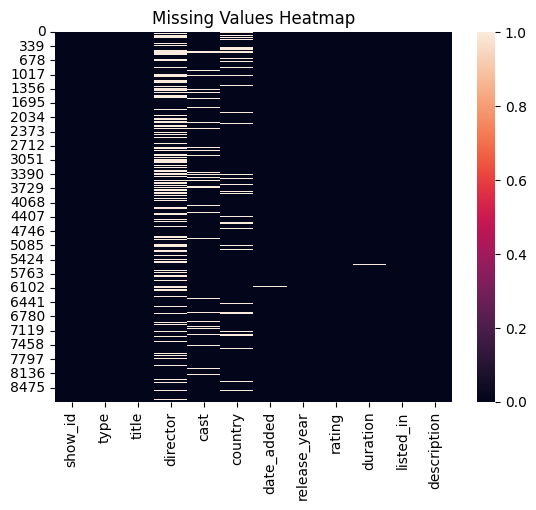

In [ ]:
#this is the visual representation of null values present
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap")

In [ ]:
#Replacing missing values in country, director and cast coiumn
df['country'].fillna("country unavailable", inplace= True)
df['director'].fillna("director unavailable",inplace= True)
df['cast'].fillna("No cast", inplace = True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director unavailable,No cast,country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Dropping rows with less missing values, and this will helps us to perform analysis easily
df.dropna(subset = ['date_added', 'duration','rating'], axis = 0, inplace = True)

In [ ]:
#Non-Graphical Analysis: Value counts and unique attributes
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
# Return count of category Movie & TV Show
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


**Insight : We have total of 65367 movies and 23938 TV Shows**

In [ ]:
# Returns unique values from "Rating" column.
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Return counts of each value in "Rating" column.
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
# Returns total no of unique values in "listed_in" column.
df['listed_in'].nunique()

513

In [ ]:
# Return counts of each value in "listed_in" column.
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy",1
"International TV Shows, TV Horror, TV Sci-Fi & Fantasy",1
"Crime TV Shows, Kids' TV",1


<Axes: ylabel='count'>

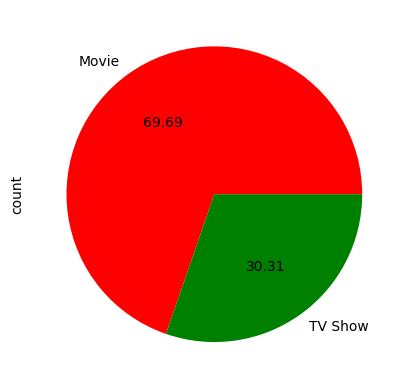

In [ ]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f", colors=["red","green"])

In [ ]:
# check the rating in descending order
df['rating'].value_counts().sort_values(ascending = False)

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


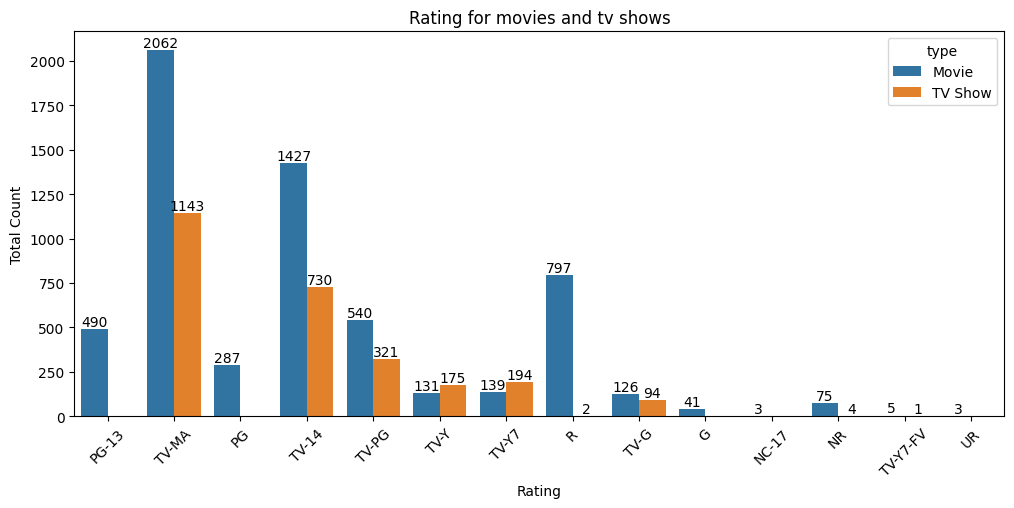

In [ ]:
# Assuming df_rating is intended to hold unique ratings in descending order
df_rating = df['rating'].unique()

plt.figure(figsize=(12, 5))
df1=sns.countplot(data=df,x="rating",hue="type",order=df_rating)
for i in df1.containers:
 df1.bar_label(i)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Rating for movies and tv shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


**Insight : We can see clearly there is a dominance of movies in the top 5 ratings from the rating column. The largest count of netflix content is made with a"TV_14" rating. "TV-14" contains a material that parents or adult guardians may find unsuitable for children under the age 14. TV shows is made with a "TV-MA" is a rating assigned by TV Parental Guidelines**

Coverting date_added column to integer and adding new column date_int to df to plot Distplot, countplot, histogram for univariate analysi

In [ ]:

# We are adding date added column as integer because it will ease our Analysis on date_added column
df["date_format"] = pd.to_datetime(df["date_added"], errors='coerce')
df["date_added_int"] = df["date_format"].dt.year.dropna().astype(int)
df['date_added_int']


,date_added_int
0,2021.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0
...,...
8802,2019.0
8803,2019.0
8804,2019.0
8805,2020.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   object        
 2   title           8790 non-null   object        
 3   director        8790 non-null   object        
 4   cast            8790 non-null   object        
 5   country         8790 non-null   object        
 6   date_added      8790 non-null   object        
 7   release_year    8790 non-null   int64         
 8   rating          8790 non-null   object        
 9   duration        8790 non-null   object        
 10  listed_in       8790 non-null   object        
 11  description     8790 non-null   object        
 12  date_format     8702 non-null   datetime64[ns]
 13  date_added_int  8702 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory

In [ ]:
# Fetching all the Data where df['type'] is equal to Movie
Movies = df[df['type']=='Movie']
Movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",country unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021.0


In [ ]:
Movies.shape

(6126, 14)

In [ ]:
Tv_show=df.loc[df["type"]=="TV Show"]
Tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
1,s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,director unavailable,No cast,country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0
4,s5,TV Show,Kota Factory,director unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,2021.0


In [ ]:
Tv_show.shape

(2664, 14)

In [ ]:
sorted_movies_year=np.sort(Movies["date_added_int"].unique())
sorted_movies_year

array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021.])

In [ ]:
yr_count = Movies["date_added_int"].value_counts().sort_index(ascending=True)
print(yr_count)

date_added_int
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     251
2017.0     836
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
Name: count, dtype: int64


In [ ]:
Tv_shows_sorted_year=np.sort(Tv_show["date_added_int"].unique())
Tv_shows_sorted_year

array([2008., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021.,   nan])

In [ ]:
yr_count_tv_shows= Tv_show["date_added_int"].value_counts().sort_index(ascending=True)
print(yr_count_tv_shows)


date_added_int
2008.0      1
2013.0      4
2014.0      4
2015.0     17
2016.0    164
2017.0    325
2018.0    387
2019.0    575
2020.0    594
2021.0    505
Name: count, dtype: int64


**Line Plot for movies vs TV-Shows added per year**

<Figure size 1200x500 with 0 Axes>

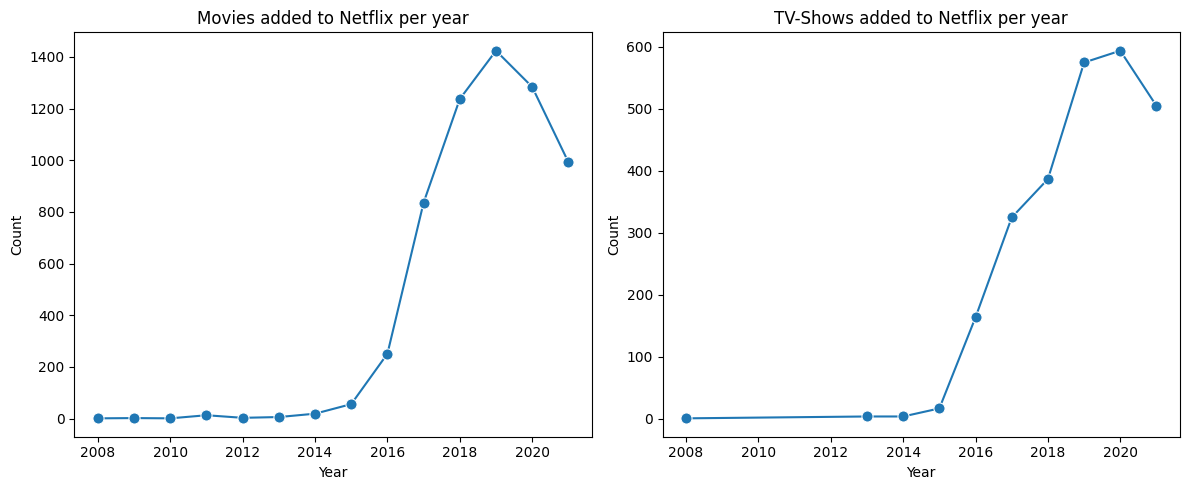

In [ ]:
plt.figure(figsize=(12, 5))
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Plot movies on the first subplot
sns.lineplot(x=sorted_movies_year, y=yr_count, marker='o', markersize=8, ax=axes[0])
axes[0].set_title("Movies added to Netflix per year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

# Plot TV shows on the second subplot
yr_count_tv_shows = Tv_show["date_added_int"].value_counts().sort_index(ascending=True)
Tv_shows_sorted_year_aligned = Tv_shows_sorted_year[np.isin(Tv_shows_sorted_year, yr_count_tv_shows.index)]
sns.lineplot(x=Tv_shows_sorted_year_aligned, y=yr_count_tv_shows, marker='o', markersize=8, ax=axes[1])
axes[1].set_title("TV-Shows added to Netflix per year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


Insight for movies : We can see an upward inclination since 2015 i.e Netflix started adding more movies from 2015 compare to previous years , Total movies added per year tops in 2019 and then we can see gradual decline in adding movies Insight for TV-Shows:We can see an upward inclination since 2015 i.e Netflix started adding more TV-Shows from 2015 compare to previous years , Total TV-Shows added per year tops in 2020 and then we can see gradual decline in adding Tv-Shows

**Univariate Analysis on Duration Column of movies**

In [ ]:
# replacing min to empty string and converting that colomn to integer type
Movies["duration"] = Movies["duration"].str.replace("min","") # Use 'Movies' instead of 'movies'
Movies["duration"] = Movies["duration"].astype(int)
Movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         6126 non-null   object        
 1   type            6126 non-null   object        
 2   title           6126 non-null   object        
 3   director        6126 non-null   object        
 4   cast            6126 non-null   object        
 5   country         6126 non-null   object        
 6   date_added      6126 non-null   object        
 7   release_year    6126 non-null   int64         
 8   rating          6126 non-null   object        
 9   duration        6126 non-null   int64         
 10  listed_in       6126 non-null   object        
 11  description     6126 non-null   object        
 12  date_format     6126 non-null   datetime64[ns]
 13  date_added_int  6126 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory

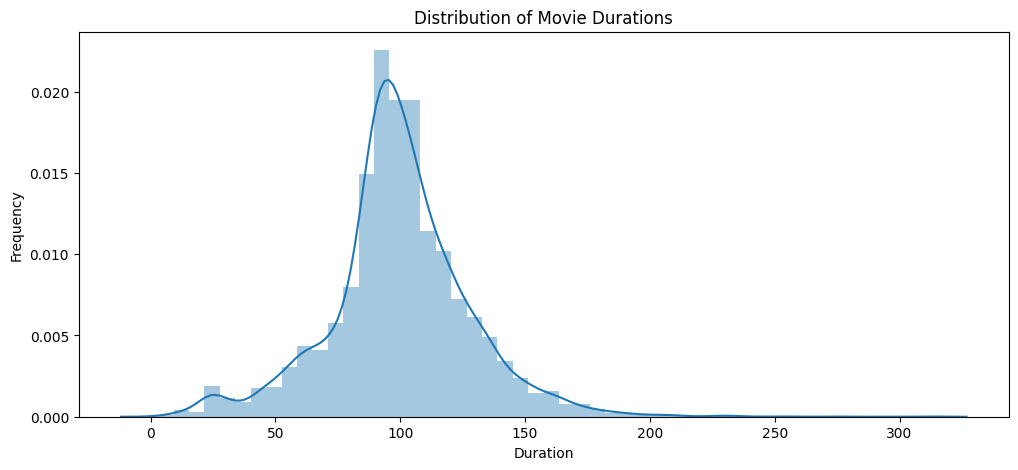

In [ ]:
# Plotting Histogram for Movie Durations
plt.figure(figsize=(12, 5))
sns.distplot(x=Movies["duration"], kde=True)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title('Distribution of Movie Durations')
plt.show()

In [ ]:
Movies["duration"]

,duration
0,90
6,91
7,125
9,104
12,127
...,...
8801,96
8802,158
8804,88
8805,88


In [ ]:
Movies["duration"].mean() #Averageduration time of movie

99.58488410055502

In [ ]:
Movies["duration"].min() #Min duration time of movie


3

In [ ]:
Movies["duration"].max() #Max duration time of movie


312

In [ ]:
Movies[Movies["duration"]==Movies["duration"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No cast,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019-06-04,2019.0


In [ ]:
Movies[Movies["duration"]==Movies["duration"].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
4253,s4254,Movie,Black Mirror: Bandersnatch,director unavailable,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018.0


Insights: We have detected outliers as 3 beain min duration and 321 being max duration and most of the duration of movies lies between 50- 150 mins

**Uni-variate Analysis on Duration column for TV-Shows**

In [ ]:
Tv_show["duration"]=Tv_show["duration"].str.replace("Seasons","") # Replacing Seasons with empty string
Tv_show["duration"]=Tv_show["duration"].str.replace("Season","") # Replacing Season with empty string
Tv_show["duration"]=Tv_show["duration"].astype(int) # Converting Duration column to interger type
Tv_show["duration"]

,duration
1,2
2,1
3,1
4,2
5,1
...,...
8795,2
8796,2
8797,3
8800,1


In [ ]:
Tv_show["duration"].value_counts()

,count
duration,
1,1791
2,421
3,198
4,94
5,64
6,33
7,23
8,17
9,9


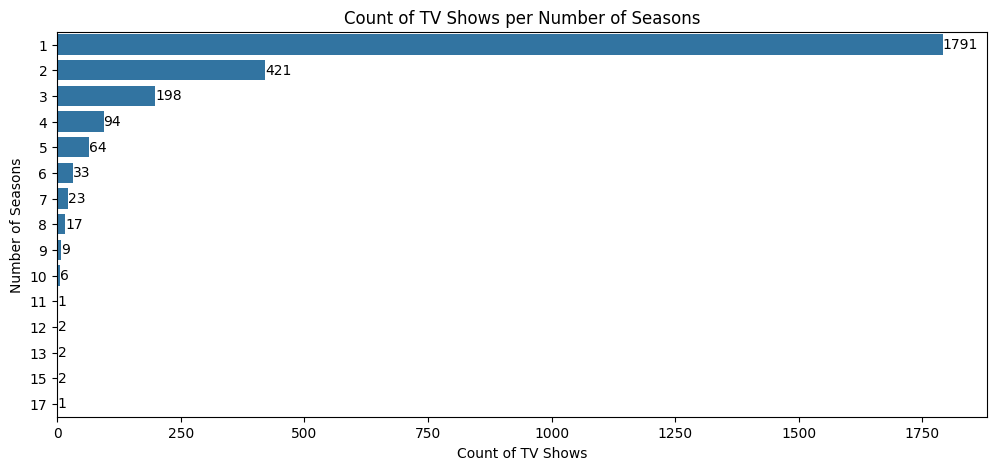

In [ ]:
plt.figure(figsize=(12, 5))
df2=sns.countplot(data=Tv_show, y="duration")
for i in df2.containers:
                  df2.bar_label(i)
plt.xlabel("Count of TV Shows")
plt.ylabel("Number of Seasons")
plt.title("Count of TV Shows per Number of Seasons")
plt.show()

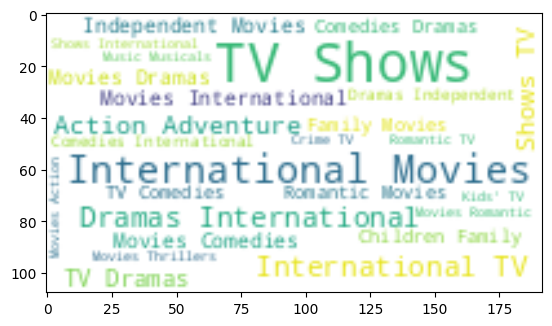

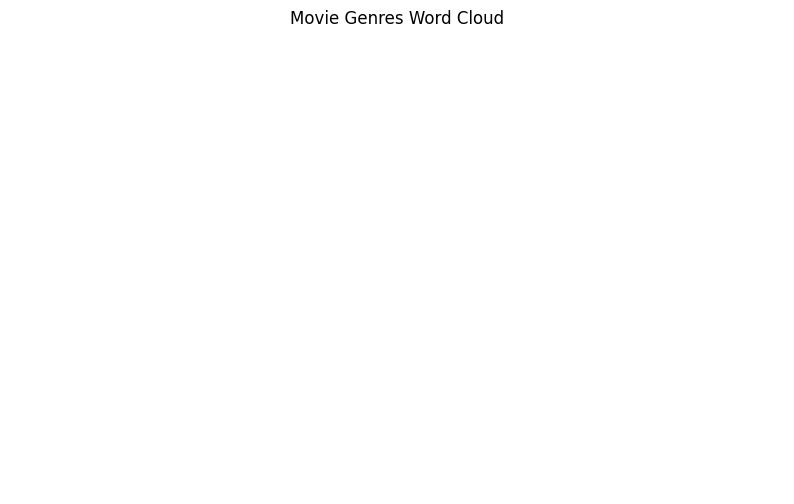

In [ ]:
# Concatenate all genre values into a single string

wordcloud=WordCloud(background_color="white", width=192,height=108).generate(" ".join(df.listed_in))
plt.imshow(wordcloud, interpolation="bilinear")
plt.figure(figsize=(10, 6))
plt.axis("off")
plt.title("Movie Genres Word Cloud")
plt.show()

In [ ]:
# Convert the values in country column to list
country_df=df.copy()
country_df['country'] = country_df['country'].astype('str').apply(
 lambda x: x.split(', '))
# Explode the rows with multiple countries to different rows
country_df = country_df.explode('country').drop_duplicates()
country_count = country_df.groupby(['type','country'])['show_id'].nunique()
country_count = country_count.reset_index().sort_values('show_id',
 ascending=False)
country_count.drop(country_count[country_count['country']=='nan'].index, inplace=True)
country_count

,type,country,show_id
114,Movie,United States,2748
43,Movie,India,962
186,TV Show,United States,932
112,Movie,United Kingdom,532
122,Movie,country unavailable,439
...,...,...,...
64,Movie,Mauritius,1
61,Movie,Malawi,1
115,Movie,"United States,",1
58,Movie,Liechtenstein,1


Visual Analysis: Bivariate/Multivariate

Popular Genres by Country

In [ ]:
df["listed_in"]

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [ ]:
# Convert the values in listed_in column to list
country_df["listed_in"]=country_df["listed_in"].astype("str").apply(lambda x: x.split(","))
country_genre_df = country_df.explode('listed_in').drop_duplicates()
country_genre_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_format,date_added_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
1,s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
1,s2,TV Show,Blood & Water,director unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country unavailable,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021-09-24,2021.0


**Popular Actors by Country**

In [ ]:
## Convert the values in cast column to list
actor_df = country_genre_df.copy()
actor_df['cast'] = actor_df['cast'].astype('str').apply(lambda x: x.split(', '))
# Explode the rows with multiple actors to different rows
actor_df = actor_df.explode('cast').drop_duplicates()

In [ ]:
actor_df=actor_df.drop(actor_df[actor_df['cast']=='nan'].index)

In [ ]:
#Preparing Data for visualisation
country_names = ['India', 'United Kingdom', 'United States',
 'Canada', 'France', 'Japan']
v_names = ['india_actors', 'uk_actors', 'us_actors',
 'canada_actors', 'france_actors', 'japan_actors']
data=[]
def country_wise_actors(country_name, var_name):
 var_name = actor_df.loc[(actor_df['type']=='Movie') &
 (actor_df['country']==country_name)].groupby(
 'cast')['show_id'].nunique().sort_values(
 ascending=False).reset_index().head(10)
 data.append(var_name)
 return data
for country_name, var_name in zip(country_names, v_names):
 country_wise_actors(country_name, var_name)
data

[               cast  show_id
 0       Anupam Kher       40
 1    Shah Rukh Khan       34
 2  Naseeruddin Shah       31
 3      Akshay Kumar       29
 4           Om Puri       29
 5      Paresh Rawal       28
 6  Amitabh Bachchan       28
 7       Boman Irani       27
 8    Kareena Kapoor       25
 9        Ajay Devgn       21,
                    cast  show_id
 0               No cast       57
 1           John Cleese       11
 2            Judi Dench        9
 3         Michael Palin        9
 4  Helena Bonham Carter        8
 5       Brendan Gleeson        8
 6          Eddie Marsan        7
 7             Eric Idle        7
 8         Terry Gilliam        7
 9           James Cosmo        7,
                 cast  show_id
 0            No cast      256
 1  Samuel L. Jackson       21
 2       Adam Sandler       20
 3       James Franco       19
 4       Nicolas Cage       18
 5     Morgan Freeman       15
 6    Fred Tatasciore       15
 7        Tara Strong       15
 8         Seth

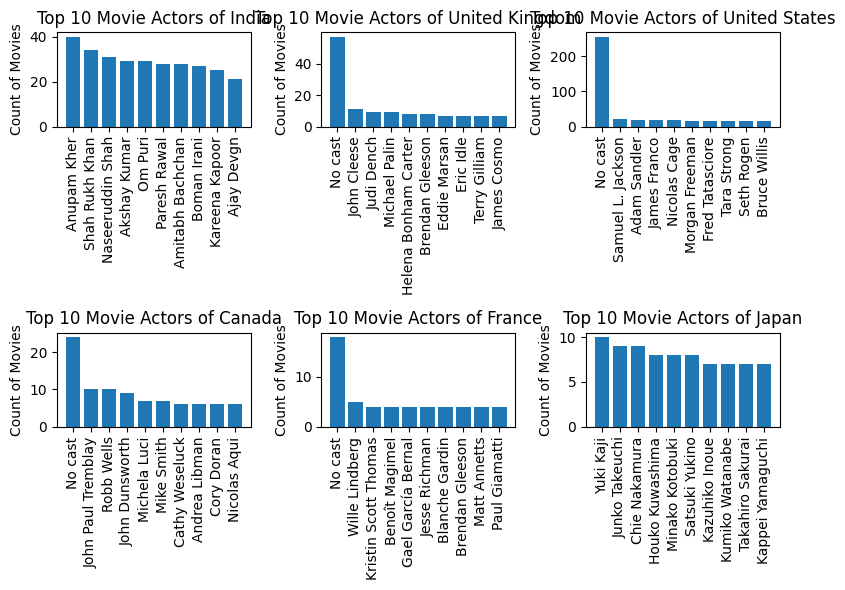

In [ ]:
#Top 10 Movie Actors by Country
fig, axes = plt.subplots(2, 3, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
 ax.bar(data[i]['cast'], data[i]['show_id'])
 ax.set_xticks(np.arange(0,10), labels=data[i]['cast'], rotation='vertical')
 ax.set_title(f'Top 10 Movie Actors of {country_names[i]}')
 ax.set_ylabel('Count of Movies')
plt.tight_layout()
plt.show();

**Popular Directors by genre**

In [ ]:
# Convert the values in director column to list
director_df = country_genre_df.copy()
director_df['director'] = director_df['director'].astype('str').apply(
 lambda x: x.split(', '))
# Explode the rows with multiple directors to different rows
director_df = director_df.explode('director').drop_duplicates()
# Drop rows with missing cast values
director_df = director_df.drop(director_df[director_df['director']=='nan'].index)

In [ ]:
#Preparing Data for visualisation
genre_names = ['Action & Adventure', 'Children & Family Movies', 'Comedies',
 'Dramas', 'International Movies', 'International TV Shows',
 'Sci-Fi & Fantasy', 'Thrillers']
v_names = ['action', 'family', 'comedies', 'dramas',
 'int_movies', 'int_tv', 'scifi', 'thrillers']
data=[]
def genre_wise_directors(genre_name, var_name):
 var_name = director_df.loc[(director_df['listed_in']==genre_name)].groupby(
 'director')['show_id'].nunique().sort_values(
 ascending=False).reset_index().head(5)
 data.append(var_name)
 return data
for genre_name, var_name in zip(genre_names, v_names):
 genre_wise_directors(genre_name, var_name)
data

[               director  show_id
 0      Don Michael Paul        9
 1  director unavailable        8
 2     Toshiya Shinohara        7
 3        S.S. Rajamouli        7
 4        Hidenori Inoue        7,
                director  show_id
 0  director unavailable       35
 1         Rajiv Chilaka       22
 2           Suhas Kadav       16
 3      Robert Rodriguez        7
 4         Prakash Satam        7,
                director  show_id
 0  director unavailable       24
 1           Hakan Algül        8
 2   Cathy Garcia-Molina        7
 3          David Dhawan        7
 4        Kıvanç Baruönü        5,
                director  show_id
 0  director unavailable       13
 1      Hanung Bramantyo        8
 2        Kunle Afolayan        6
 3        Clint Eastwood        5
 4     Madhur Bhandarkar        5,
                    director  show_id
 0      director unavailable        5
 1  Fernando González Molina        3
 2          Theodore Boborol        3
 3   Saratswadee Wongsomphet

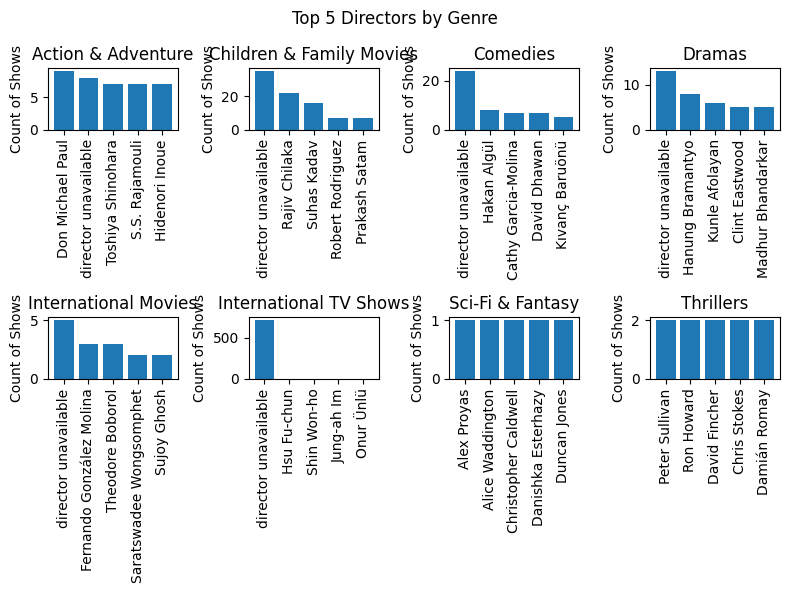

In [ ]:
#Top 5 Directors by Genre
fig, axes = plt.subplots(2, 4, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
 ax.bar(data[i]['director'], data[i]['show_id'])
 ax.set_xticks(np.arange(0,5), labels=data[i]['director'], rotation='vertical')
 ax.set_title(f'{genre_names[i]}')
 ax.set_ylabel('Count of Shows')
plt.suptitle("Top 5 Directors by Genre")
plt.tight_layout()
plt.show();

Inferences and Conclusion We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

The most content type on Netflix is movies.

The country by the amount of the produces content is the United States,

The most popular director on Netflix , with the most titles, is Jan Suter.

International Movies is a genre that is mostly in Netflix.

largest count of Netflix content is made with a “TV-14” rating.

The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai.

The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

Business Insights Range of Attributes: Type of Show: Approx 70% shows are movies and remaining 30% are TV shows The release year for shows is concentrated in the range 2000-2021 The year of adding shows is concentrated in the range 2015-2021 Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot) TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers Countries: Out of 128 countries present in the dataset, only 23 countries have more than 50 movie titles and only 11 countries have more than 50 TV Shows Ratings: There are 12 different kinds of ratings based on the relevance of the content for different age-groups The dataset consists of 36,392 actors and 4,991 directors

Type of content across Countries: USA, followed by India, UK, Canada, France have the highest number of movie listings. USA, followed by UK, Japan, South Korea and Canada have the highest number of TV show listings Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7) Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain) United States and UK have a good mix of almost all genres

Content Rating: Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 (14 yrs & above) & R/TV-PG (Restricted/Parental Guidance). Overall, Netflix has an unproportionately large amount of adult content across all countries. There is scarce content for general audience (TV-G & G) across all countries except US Genre: Most popular genres: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers Duration: There is a surge in the number of short duration movies (less than 75 mins) post 2010 All 1-5 season TV shows are concentrated in 2010-2020 release year window. Older TV Shows have more number of seasons

**Recommendations :**

1. Add more content for young/general audiences: 80% of the content on netflix (7022 out of 8790 titles) is either for mature audiences or requires parental guidance. In order to expand its target audience, Netflix needs to add more shows for familyand children.

2. Add more variety of content in countries other than US/UK: While US and UK have a healthy mix of all categories of content, other contries do not.

3. At least other english speaking countries like Australia and India should have an equally good mix of content. A wider population can be targetted with more titles in genres like documentaries, horror, standup comedy, crime and musicals for these countries. Country-specific genres: Just like Korean drama and Anime are available in Korea/Japan, more country-specific niches should be created in order to build more customisation. French and German shows would increase business in Europe. India also has blockbusters in many regional languages.